# Домашнее задание по теме: Конструирование признаков (Feature Engineering)

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Создание `DataFrame` для примера

In [7]:
# социологический опрос
df = pd.DataFrame({'name_age': pd.Series(['Oleg 25', 'Pete 32',
                                          'Fedor 31', 'Teodor 55',
                                          'Elena 19', 'Viktor 18',
                                          'Anton 36', 'Boris 45',
                                          'Alex 25', 'Sergey 32'],
                                         dtype='string'),

                   'occupation': pd.Series(['programmer', 'teacher',
                                            'programmer', 'teacher',
                                            'student', 'student',
                                            'teacher', 'manager',
                                            'manager', 'programmer'],
                                           dtype='category'),

                   'weight': pd.Series([80, 98,
                                        86, 88,
                                        60, 75,
                                        91, 96,
                                        65, 73],
                                       dtype='int16'),

                  'life_satisfaction': pd.Series(['5 point', '3 point',
                                                  '4 point', '3 point',
                                                  '1 point', '2 point',
                                                  '4 point', '4 point',
                                                  '4 point', '4 point'],
                                           dtype=pd.CategoricalDtype(categories=['1 point',
                                                                                 '2 point',
                                                                                 '3 point',
                                                                                 '4 point',
                                                                                 '5 point'], ordered=True)),

                'relatives_income_k_rub': pd.Series(['150+', '30-80',
                                                     '30-80', '30-80',
                                                     '0-15', '16-30',
                                                     '30-80', '80-150',
                                                     '16-30', '80-150'],
                                                    dtype=pd.CategoricalDtype(categories=['0-15',
                                                                                '16-30',
                                                                                '30-80',
                                                                                '80-150',
                                                                                '150+'], ordered=True)),

                  'favourite_dish': pd.Series(['cake', 'steak',
                                               'steaks', 'sweet',
                                               'CAKES', 'candy',
                                               'candies', 'dairy',
                                               'milk', 'Dairy'],
                                              dtype='string'),

                   'income_per_hour_rub': pd.Series([300.50, 150.33,
                                                     265.54, 85.69,
                                                     3_150.54, 450.84,
                                                     2_140.36, 1_650.36,
                                                     2_425.84, 1_745.85],
                                                    dtype='float'),

                  'number_working_days_per_week': pd.Series([5, 5,
                                                             4, 2,
                                                             1, 6,
                                                             7, 2,
                                                             5, 4],
                                                            dtype='int8'),

                   'number_working_hours_per_day': pd.Series([8, 8,
                                                              7, 12,
                                                              24, 8,
                                                              3, 10,
                                                              7, 8],
                                                             dtype='int8'),

                   'tell_me_about_yourself': pd.Series(["I'm just a normal person. Nothing special.",
                                                        "I'm a good person. I teach children all over the world.",
                                                        "Nothing special, just a good programmer and father.",
                                                        "I'm a father and hasband. I love teach my son.",
                                                        "I'm a good student and I want to travel all over the world. I'm going to be a programmer some day!",
                                                        "I'm a normal student. I want to be a teacher.",
                                                        "I'm a hasband and teacher. I teach how to be a programmer. I have a son. I love him.",
                                                        "I don't know what to say. I'm a normal husband and good father.",
                                                        "Now I'm a manager but I'm going to be a programmer. I want to be a good student.",
                                                        "I'm special person! I can do what ever I want! I can be a husband and programmer simultaneously!"],
                                                       dtype='string'),

                   'favourite_weather': pd.Series(['rainbow/fog/warm',
                                                   'sun/fog/rainbow',
                                                   'chilly/fog/sun',
                                                   'rainbow',
                                                   'chilly/sun',
                                                   'warm/sun',
                                                   'chilly',
                                                   'rainbow/sun', 
                                                   'warm/sun',
                                                   'fog/rainbow'],
                                                  dtype='string'),

                    'answer_date_time': pd.Series(['10.10.2020 18:25', '20.12.2020 16:36',
                                                   '06.01.2021 10:14', '07.04.2021 23:25',
                                                   '26.11.2020 06:17', '18.05.2020 15:15',
                                                   '10.03.2021 09:08', '25.02.2020 04:57',
                                                   '28.08.2020 12:54', '10.09.2019 23:25'],
                                                  dtype='datetime64[ns]'),

                   'marital_status': pd.Series(['Married (and not separated)', 
                                                'Single (including living common law)',
                                                'Single (including living common law)', 
                                                'Married (and not separated)',
                                                'Single (including living common law)', 
                                                'Single (including living common law)',
                                                'Married (and not separated)', 
                                                'Single (including living common law)',
                                                'Married (and not separated)', 
                                                'Married (and not separated)'],
                                               dtype='string')
                  })

In [8]:
# отображать все колонки
pd.options.display.max_columns = None

In [9]:
df

,name_age,occupation,weight,life_satisfaction,relatives_income_k_rub,favourite_dish,income_per_hour_rub,number_working_days_per_week,number_working_hours_per_day,tell_me_about_yourself,favourite_weather,answer_date_time,marital_status
0,Oleg 25,programmer,80,5 point,150+,cake,300.50,5,8,I'm just a normal person. Nothing special.,rainbow/fog/warm,2020-10-10 18:25:00,Married (and not separated)
1,Pete 32,teacher,98,3 point,30-80,steak,150.33,5,8,I'm a good person. I teach children all over t...,sun/fog/rainbow,2020-12-20 16:36:00,Single (including living common law)
2,Fedor 31,programmer,86,4 point,30-80,steaks,265.54,4,7,"Nothing special, just a good programmer and fa...",chilly/fog/sun,2021-06-01 10:14:00,Single (including living common law)
3,Teodor 55,teacher,88,3 point,30-80,sweet,85.69,2,12,I'm a father and hasband. I love teach my son.,rainbow,2021-07-04 23:25:00,Married (and not separated)
4,Elena 19,student,60,1 point,0-15,CAKES,3150.54,1,24,I'm a good student and I want to travel all ov...,chilly/sun,2020-11-26 06:17:00,Single (including living common law)
5,Viktor 18,student,75,2 point,16-30,candy,450.84,6,8,I'm a normal student. I want to be a teacher.,warm/sun,2020-05-18 15:15:00,Single (including living common law)
6,Anton 36,teacher,91,4 point,30-80,candies,2140.36,7,3,I'm a hasband and teacher. I teach how to be a...,chilly,2021-10-03 09:08:00,Married (and not separated)
7,Boris 45,manager,96,4 point,80-150,dairy,1650.36,2,10,I don't know what to say. I'm a normal husband...,rainbow/sun,2020-02-25 04:57:00,Single (including living common law)
8,Alex 25,manager,65,4 point,16-30,milk,2425.84,5,7,Now I'm a manager but I'm going to be a progra...,warm/sun,2020-08-28 12:54:00,Married (and not separated)
9,Sergey 32,programmer,73,4 point,80-150,Dairy,1745.85,4,8,I'm special person! I can do what ever I want!...,fog/rainbow,2019-10-09 23:25:00,Married (and not separated)


## **ВНИМАНИЕ**

- Вместо строки `место_для_ответа` необходимо вписать свой ответ. Не рядом, а вместо. Остальную часть оформления менять не нужно.

- В ячейках с комментариями необходимо реализовать то, что описывает комментарий.

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- В строке "Подсказки" могут быть перечислены какие-то методы, которыми можно воспользоватся, но это не обязательно, это только один из множества вариантов (не факт, что лучший).

- Результаты обработки можно добавлять к специально созданному чистому `DataFrame`, или к существующиму (как в примерах из лекции).

- В конце каждого задания необходимо выводить результ в формате "было-стало". Может был указано любое нужное количество колонок (зависит от задания). Важно показать результат по сравнению с исходными данными. Пример: `df[['name_age', 'age']]`.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- Если в задании требуется нарисовать график, то он нужен вначале (показать как было) и в конце (как стало).

- В некоторых задания необходимо понимать, что значит каждое слово (для их группировки, например). Если зачение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйства, будьте внимательны, перепроверяйте значения слов, если не уверены.  

In [10]:
# получить список колонок и их типы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name_age                      10 non-null     string        
 1   occupation                    10 non-null     category      
 2   weight                        10 non-null     int16         
 3   life_satisfaction             10 non-null     category      
 4   relatives_income_k_rub        10 non-null     category      
 5   favourite_dish                10 non-null     string        
 6   income_per_hour_rub           10 non-null     float64       
 7   number_working_days_per_week  10 non-null     int8          
 8   number_working_hours_per_day  10 non-null     int8          
 9   tell_me_about_yourself        10 non-null     string        
 10  favourite_weather             10 non-null     string        
 11  answer_date_time              10 no

### Анализ типов шкал

(см. [лекцию](../../03_data_analysis/lectures/08_statistical_data_types.ipynb))

| Наименование | Шкала |
|     -:      |  :-  |
| `name_age` | номинальная |
| `occupation` | номинальная |
| `weight` | отношений |
| `life_satisfaction` | порядковая |
| `relatives_income_k_rub` | порядковая |
| `favourite_dish` | номинальная |
| `income_per_hour_rub` | отношений |
| `number_working_days_per_week` | отношений |
| `number_working_hours_per_day` | отношений |
| `tell_me_about_yourself` | номинальная |
| `favourite_weather` | номинальная |
| `answer_date_time` | интервальная |
| `marital_status` | номинальная или порядковая |

## Строковые признаки

In [11]:
# получить все колонки типа string
df.select_dtypes(include='string')

,name_age,favourite_dish,tell_me_about_yourself,favourite_weather,marital_status
0,Oleg 25,cake,I'm just a normal person. Nothing special.,rainbow/fog/warm,Married (and not separated)
1,Pete 32,steak,I'm a good person. I teach children all over t...,sun/fog/rainbow,Single (including living common law)
2,Fedor 31,steaks,"Nothing special, just a good programmer and fa...",chilly/fog/sun,Single (including living common law)
3,Teodor 55,sweet,I'm a father and hasband. I love teach my son.,rainbow,Married (and not separated)
4,Elena 19,CAKES,I'm a good student and I want to travel all ov...,chilly/sun,Single (including living common law)
5,Viktor 18,candy,I'm a normal student. I want to be a teacher.,warm/sun,Single (including living common law)
6,Anton 36,candies,I'm a hasband and teacher. I teach how to be a...,chilly,Married (and not separated)
7,Boris 45,dairy,I don't know what to say. I'm a normal husband...,rainbow/sun,Single (including living common law)
8,Alex 25,milk,Now I'm a manager but I'm going to be a progra...,warm/sun,Married (and not separated)
9,Sergey 32,Dairy,I'm special person! I can do what ever I want!...,fog/rainbow,Married (and not separated)


### Получить информацию из строки

В колонке `name_age` содержится имя и возраст.

Необходимо получить данные о возрасте.

Результ сохранить в отдельную колонку `age`.

Подсказка: `apply`.

In [12]:
df['age'] = df.name_age.apply(lambda x: x.split(" ")[1])

df[['name_age', 'age']]

,name_age,age
0,Oleg 25,25
1,Pete 32,32
2,Fedor 31,31
3,Teodor 55,55
4,Elena 19,19
5,Viktor 18,18
6,Anton 36,36
7,Boris 45,45
8,Alex 25,25
9,Sergey 32,32


### Группировка строковых признаков и формирование "групп"

Сгруппировать значения из колонки `favourite_dish` по своему усмотрению.

Нарисовать график показывающий распределение категорий в колонке.

Результ сохранить в отдельную колонку `favourite_dish_grouped`.

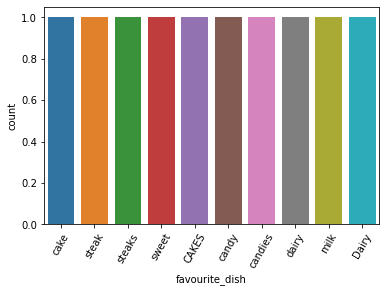

In [13]:
g = sns.countplot(x=df.favourite_dish)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=60)

In [14]:
df.favourite_dish.values

<StringArray>
[   'cake',   'steak',  'steaks',   'sweet',   'CAKES',   'candy', 'candies',
   'dairy',    'milk',   'Dairy']
Length: 10, dtype: string

In [15]:
sweet_replacement = dict.fromkeys(['cake', 'CAKES', 'candy', 'candies'], 'sweet')
dairy_replacement = dict.fromkeys(['milk', 'Dairy'], 'dairy')

In [16]:
df['favourite_dish_grouped'] = df.favourite_dish.replace(to_replace=sweet_replacement).replace(to_replace=dairy_replacement).replace(to_replace='steaks', value='steak')

df[['favourite_dish', 'favourite_dish_grouped']]

,favourite_dish,favourite_dish_grouped
0,cake,sweet
1,steak,steak
2,steaks,steak
3,sweet,sweet
4,CAKES,sweet
5,candy,sweet
6,candies,sweet
7,dairy,dairy
8,milk,dairy
9,Dairy,dairy


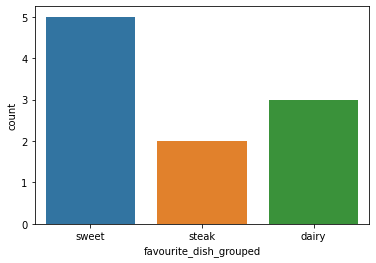

In [17]:
_ = sns.countplot(x=df.favourite_dish_grouped)

### Разделить строку на несколько признаков

Разделить значения из колонки `favourite_weather`.

Результ сохранить в отдельные колонки с суффиксом `_fw` (в конце каждого названия).


In [18]:
df.favourite_weather

0    rainbow/fog/warm
1     sun/fog/rainbow
2      chilly/fog/sun
3             rainbow
4          chilly/sun
5            warm/sun
6              chilly
7         rainbow/sun
8            warm/sun
9         fog/rainbow
Name: favourite_weather, dtype: string

In [25]:
favourite_weather_df = df.favourite_weather.apply(lambda x: pd.Series(True, index=[f'{w}_fw' for w in x.split("/")]))
favourite_weather_df = favourite_weather_df.fillna(False)
favourite_weather_df

,rainbow_fw,fog_fw,warm_fw,sun_fw,chilly_fw
0,True,True,True,False,False
1,True,True,False,True,False
2,False,True,False,True,True
3,True,False,False,False,False
4,False,False,False,True,True
5,False,False,True,True,False
6,False,False,False,False,True
7,True,False,False,True,False
8,False,False,True,True,False
9,True,True,False,False,False


In [ ]:
df = df.join(favourite_weather_df)

In [28]:
df[['favourite_weather'] + favourite_weather_df.columns.to_list()]

,favourite_weather,rainbow_fw,fog_fw,warm_fw,sun_fw,chilly_fw
0,rainbow/fog/warm,True,True,True,False,False
1,sun/fog/rainbow,True,True,False,True,False
2,chilly/fog/sun,False,True,False,True,True
3,rainbow,True,False,False,False,False
4,chilly/sun,False,False,False,True,True
5,warm/sun,False,False,True,True,False
6,chilly,False,False,False,False,True
7,rainbow/sun,True,False,False,True,False
8,warm/sun,False,False,True,True,False
9,fog/rainbow,True,True,False,False,False


### Преобразовать к другому типу с помощью `map` (`pandas`)

ВНИМАНИЕ: Требуется понимание предметной области!

In [ ]:
df.status

In [ ]:
df['is_sold_out'] = df.status.map({'sold out': True, 'for sale': False})
df

### *Мешок слов (bag-of-words) на примере `CountVectorizer` (`sklearn`)

[sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

См. другие популярные подходы [sklearn.feature_extraction.text](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# можно определить различные параметры
# lowercase - преобразовать все слова к нижнему регистру
cv = CountVectorizer(lowercase=True, stop_words='english')
cv

In [ ]:
# подготовить кодировщик
# произвести преобразования
item_description_cv = cv.fit_transform(df.item_description)

# ВНИМАНИЕ: scipy.sparse.csr.csr_matrix - это не то, что можно сразу же добавить к DataFrame
print(type(item_description_cv))
item_description_cv

In [ ]:
# получить имена новых колонок из кодировщика
item_description_column_names = cv.get_feature_names()
item_description_column_names

In [ ]:
# показать словарь
# ВНИМАНИЕ: числа - НЕ счетчик, это позиция в разреженном векторе
cv.vocabulary_.items()

<img src="images/count_vectorizer_theory_vs_reality.png" height=700 width=700 />

<img src="images/count_vectorizer_example.png" height=400 width=400 />

In [ ]:
# преобразовать из scipy.sparse.csr.csr_matrix
# в numpy.ndarray
item_description_cv.toarray()

In [ ]:
# информация по каждому слову
vocab_dict = {}
for word, col_idx in cv.vocabulary_.items():
    num = sum(sum(x) for x in item_description_cv[:, col_idx].toarray())
    vocab_dict[(word, col_idx)] = num
    print(f"sum({word}(id={col_idx})): {num}")
    for row_idx in range(item_description_cv.get_shape()[0]):
        print(f"{word}{row_idx}:{item_description_cv[row_idx, col_idx]}", end='  ')
        
    print('\n')

In [ ]:
# отсортировать словарь слово-счетчик по убыванию
vocab_dict_sorted = dict(sorted(vocab_dict.items(), 
                                key=lambda item: item[1], 
                                reverse=True))
vocab_dict_sorted

In [ ]:
# получить id слов со счетчиком >= 3
gte_3 = [k[1] for k, v in vocab_dict_sorted.items() if v >= 3]
gte_3

In [ ]:
# получить счетчики по id слов со счетчиком >= 3
gte_3_array = item_description_cv.toarray()[:, gte_3]
gte_3_array

In [ ]:
# получить слова со счетчиком >= 3 по id
gte_3_col_names = [item_description_column_names[i] for i in gte_3]
gte_3_col_names

In [ ]:
# соединить закодированные данные с названиями колонок и
# преобразовать в DataFrame
df_item_description_cv = pd.DataFrame(gte_3_array, columns=gte_3_col_names)
df_item_description_cv

In [ ]:
# присоединить закодированные колонки
# к основному набору данных с суффиксом
df = df.join(df_item_description_cv.add_suffix("_cv"))
df

## Категориальные признаки

**Пример:**
Цвет (item_color), т.е. синий (blue), красный (red), зеленый (green).


**Возможное решение:**
- Добавить комбинации признаков вида "is_red", "is_blue", "is_green", "is_red_or_blue" и т.п.
- Объединение в группы (Binning = `map`/`replace`).
- Категория -> число (`map`, `replace`, `Dummies`, `OrdinalEncoder`, `LabelEncoder`, `BinaryEncoder`, `OneHotEncoder`, `LabelBinarizer` и [другие](https://contrib.scikit-learn.org/category_encoders/)).
- Заменить признаки на их количество (`CountEncoder`).
| `TargetEncoder`.
| `CatBoostEncoder`.

In [ ]:
# получить все колонки типа category
df.select_dtypes(include='category')

### Комбинации признаков с помощью bool mask filter

In [ ]:
df.item_color.value_counts()

In [ ]:
df['is_white'] = df.item_color == 'white'
df['is_blue'] = df.item_color == 'blue'

# ИЛИ
df['is_rainbow'] = df.item_color.isin(['rainbow'])
df['is_red'] = df.item_color.isin(['red'])

In [ ]:
df['is_item_color_white_or_blue'] = (df.item_color == 'white') | (df.item_color == 'blue')

# ИЛИ
df['is_item_color_rainbow_or_red'] = df.item_color.isin(['rainbow', 'red'])

In [ ]:
df[['item_color', 
    'is_white', 'is_blue', 'is_rainbow', 
    'is_red', 'is_item_color_white_or_blue', 
    'is_item_color_rainbow_or_red']]

### Группировка категориальных признаков и формирование "интервалов" (Binning/Discretization)

При использовании категориальных признаков можно столкнуться с такими проблемами:
- редкие метки (rare labels), 
- категории / группы, которые крайне редко встречаются в наборе данных. 

Эти проблемы часто связаны с признаками, имеющими высокую мощность (high cardinality) - другими словами, с большим количеством различных категорий.

Слишком много категорий, особенно редких, приводит к зашумлению набора данных.

Алгоритму ML может быть сложно преодолеть этот шум и учиться на более значимых сигналах в данных.

Высокая кардинальность также может усугубить [проклятие размерности (curse of dimensionality)](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8), если выбрать `OneHotEncoder` для таких категориальных признаков. Таким образом, если исходная переменная имеет 50 различных категорий, то добавляется 49 столбцов в набор данных.

Наличие слишком большого количества категорий также может привести к проблемам при обучении и тестировании модели. Вполне возможно, что категория появится в тестовом наборе, но не в обучающем наборе. Модель не знает, как обращаться с этой категорией, потому что она никогда ее раньше не "видела".

Один из способов решения этих проблем — разработка новых признаков с меньшим количеством категорий. Это может быть выполнено путем объединения (группировки) нескольких категорий в одну категорию.

In [ ]:
df.item_title

In [ ]:
# какие наименования имеются?
g = sns.countplot(x=df.item_title)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=60)

In [ ]:
# сформировать, что заменяем и на что
animal_mapping = dict.fromkeys(['Beautiful Cat', 'Dog', 'Kitty'], 'Animal')
toy_mapping = dict.fromkeys(['toy', 'Toys', 'Soft TOY'], 'Toy')
electronic_mapping = dict.fromkeys(['TV', 'Television', 'Smartphone'], 'Electronic')

animal_mapping, toy_mapping, electronic_mapping

In [ ]:
all_mapping = {}
all_mapping.update(animal_mapping)
all_mapping.update(toy_mapping)
all_mapping.update(electronic_mapping)
all_mapping.update({'Car': 'Car'})    # иначе вместо него будет nan

all_mapping

In [ ]:
# создать новую колонку с замененными значениями
df['item_title_bins'] = df.item_title.map(all_mapping)
df.item_title_bins

In [ ]:
_ = sns.countplot(x=df.item_title_bins)

### Объединение в группы с помощью `replace` (`pandas`)

In [ ]:
_ = sns.countplot(x=df.item_color)

In [ ]:
item_color_replacement = {name: num for num, name in enumerate(df.item_color.value_counts().index)}
item_color_replacement

In [ ]:
# ВНИМАНИЕ: не удаляет значения, которые не указаны в replace
df['item_color_nums'] = df.item_color.replace(item_color_replacement)

In [ ]:
df[['item_color', 'item_color_nums']]

### Объединение в группы с помощью `map` (`pandas`)

In [ ]:
_ = sns.countplot(x=df.user_country)

In [ ]:
user_country_mapping = {name: num for num, name in enumerate(df.user_country.value_counts().index)}
user_country_mapping

In [ ]:
# ВНИМАНИЕ: удаляет значения, которые не указаны в map
df['user_country_nums'] = df.user_country.map(user_country_mapping)

In [ ]:
df[['user_country', 'user_country_nums']]

### `LabelEncoder` (`sklearn`)

**ВНИМАНИЕ: `LabelEncoder` и `OrdinalEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс `OrdinalEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelEncoder` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

<img src="images/label_encoder_example.png" height=700 width=700/>

Этот подход **предполагает упорядочение категорий**:

`Никогда (0) < Редко (1) < Большинство дней (2) < Каждый день (3)`.

В результате получается один столбец целых чисел (от `0` до `n_categories - 1`) (тип `float`).

Входные данные должны быть массивом целых чисел или строк, обозначающих значения, принимаемые категориальными (дискретными) признаками.

Этот преобразователь следует использовать для кодирования целевых значений, т.е. `y`, а не входного `X`.

Для моделей на основе деревьев (таких, как деревья решений = `decision trees` и случайные леса = `random forests`) можно ожидать, что `LabelEncoder` будет хорошо работать с порядковыми переменными.

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc_l = LabelEncoder()
enc_l

In [ ]:
# подготовить кодировщик
# можно использовать несколько раз
# указать все возможные значения целевой переменной
# можно больше, чем имеется сейчас в наборе данных
enc_l.fit(['Russia', 'Germany', 'USA', 'India', 'Other'])

In [ ]:
# произвести преобразования с помощью заранее подготовленного кодировщика
df['user_country_enc_l'] = enc_l.transform(df.user_country)

In [ ]:
# пронумерованы в алфавитном порядке
# другой порядок стандартными средствами не установить
df[['user_country', 'user_country_enc_l']]

### `OrdinalEncoder` (`sklearn`)

**ВНИМАНИЕ: `LabelEncoder` и `OrdinalEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс `OrdinalEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelEncoder` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

Кодирует категориальные признаки в целочисленный массив.

<img src="images/label_encoder_example.png" height=700 width=700/>

Этот подход **предполагает упорядочение категорий**:

`Никогда (0) < Редко (1) < Большинство дней (2) < Каждый день (3)`.

Это предположение имеет смысл в этом примере, потому что существует неоспоримое ранжирование категорий.

Входные данные должны быть массивом целых чисел или строк, обозначающих значения, принимаемые категориальными (дискретными) признаками. 

Признаки преобразуются в порядковые целые числа.

В результате получается один столбец целых чисел (от `0` до `n_categories - 1`) *для каждого признака* (тип `float`).

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# можно определить порядок в каждой категории
# (хорошо подходит для ранговых шкал)
# если не определить порядок, то будет алфавитный
enc_ord = OrdinalEncoder(categories=[['red', 'white', 'blue', 'rainbow'], ['5 point', '4 point', '3 point', '2 point', '1 point']])
enc_ord

In [ ]:
# подготовить кодировщик
# можно использовать несколько раз
enc_ord.fit(df[['item_color', 'user_complaints']])

In [ ]:
# произвести преобразования с помощью заранее подготовленного кодировщика
df[['item_color_enc_ord', 'user_complaints_enc_ord']] = enc_ord.transform(df[['item_color', 'user_complaints']])

# пронумерованы в соответствии с указанным при создании порядком
df[['item_color', 'item_color_enc_ord', 'user_complaints', 'user_complaints_enc_ord']]

In [ ]:
df.item_color_enc_ord.dtype

### `OneHotEncoder` (`sklearn`)

**ВНИМАНИЕ: `LabelBinarizer` и `OneHotEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс`OneHotEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelBinarizer` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

Бинаризирует признаки по принципу "один против всех (one-vs-all)".

(aka `one-of-K` или `dummy`)

При использовании `OneHotEncoder` создаются новые столбцы, указывающие на наличие (или отсутствие) каждого возможного значения в исходных данных.

<img src="images/one_hot_encoder_example.png" height=700 width=700/>

В исходном наборе данных "Цвет" - это категориальная переменная с тремя категориями: "Красный", "Желтый" и "Зеленый".

Соответствующий `OneHotEncoder` содержит один столбец для каждого возможного значения и одну строку для каждой строки в исходном наборе данных.

Если исходным значением было "Красный", помещаем 1 в столбец "Красный". Если исходным значением было "Желтый", мы помещаем 1 в столбец "Желтый" и так далее.

`OneHotEncoder` **НЕ предполагает упорядочивания категорий**.

Таким образом, вы можете ожидать, что этот подход будет работать особенно хорошо, если в категориальных данных *нет четкого упорядочения* (например, "Красный" не больше и не меньше, чем "Желтый").

Невозможно явно контролировать, что происходит, когда встречается новый "синий": если предполагается, что это невозможно, то можно указать, чтобы он выдал ошибку с помощью `handle_unknown = "error"`; в противном случае мы можем сказать ему продолжить и просто установить красный и зеленый столбцы в 0 с помощью `handle_unknown = "ignore"`.

Категориальные переменные без внутреннего ранжирования называют **номинальными переменными**.

Объект `OneHotEncoder` обычно работает не очень хорошо, если категориальная переменная принимает большое количество значений (т.е. обычно **НЕ следует использовать его для признаков, принимающих более 15 различных значений**).

Класс `OneHotEncoder` необходим для подачи категориальных данных во многие алгоритмы `scikit-learn` особенно **линейные модели** и **SVM со стандартными ядрами**.

In [ ]:
# известно, что в данном наборе данных не представлен вариант '3 point'
df.user_complaints.unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# можно определить значения в каждой категории
# (хорошо подходит для номинальных шкал, 
# в которых не все значения представлены в наборе данных)
enc_oh = OneHotEncoder(sparse=False, categories=[['1 point', '2 point', '3 point', '4 point', '5 point'], 
                                                 df.user_rating.unique()])
enc_oh

In [ ]:
# подготовить кодировщик
# можно использовать несколько раз
enc_oh.fit(df[['user_complaints', 'user_rating']])

In [ ]:
# произвести преобразования с помощью заранее подготовленного кодировщика
enc_l_result = enc_oh.transform(df[['user_complaints', 'user_rating']])

# ВНИМАНИЕ: np.array - это не то, что можно сразу же добавить к DataFrame
enc_l_result

In [ ]:
# получить имена новых колонок из кодировщика
column_names = enc_oh.get_feature_names(['user_complaints_enc_oh', 
                                         'user_rating_enc_oh'])
column_names

In [ ]:
# соединить закодированные данные с названиями колонок и
# преобразовать в DataFrame
# ВНИМАНИЕ: существует колонка 3 points!
df_enc_l_result = pd.DataFrame(enc_l_result, columns=column_names)
df_enc_l_result

In [ ]:
# присоединить закодированные колонки к основному набору данных
df = df.join(df_enc_l_result)
df

### `LabelBinarizer` (`sklearn`)

**ВНИМАНИЕ: `LabelBinarizer` и `OneHotEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс `OneHotEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelBinarizer` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

Бинаризирует признаки по принципу "один против всех (one-vs-all)".

(aka `one-of-K` или `dummy`)

<img src="images/one_hot_encoder_example.png" height=700 width=700/>


При использовании `LabelBinarizer` создаются новые столбцы, указывающие на наличие (или отсутствие) каждого возможного значения в исходных данных.

`LabelBinarizer` **НЕ предполагает упорядочивания категорий**.

Категориальные переменные без внутреннего ранжирования называют **номинальными переменными**.

**НЕ следует использовать его для признаков, принимающих более 15 различных значений**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

enc_l_b = LabelBinarizer()
enc_l_b

In [ ]:
# подготовить кодировщик
# можно использовать несколько раз
# указать все возможные значения целевой переменной
# дихотомическое значение (2 штуки)
enc_l_b.fit(df.status)

In [ ]:
# произвести преобразования с помощью заранее подготовленного кодировщика
# ВНИМАНИЕ: при дихотомическом значение (2 штуки) 
# можно сразу же добавить к DataFrame
df['status_enc_l_b'] = enc_l_b.transform(df.status)

# значения заменены на 0 и 1
df[['status', 'status_enc_l_b']]

In [ ]:
# подготовить кодировщик
# можно использовать несколько раз
# указать все возможные значения целевой переменной
# не дихотомическое значение (>2 штук)
enc_l_b.fit(df['user_rating'])

In [ ]:
# произвести преобразования с помощью заранее подготовленного кодировщика
enc_l_b_result = enc_l_b.transform(df['user_rating'])

# ВНИМАНИЕ: np.array - это не то, что можно сразу же добавить к DataFrame
enc_l_b_result

In [ ]:
# получить имена новых колонок из кодировщика
column_names = enc_l_b.classes_
column_names

In [ ]:
# соединить закодированные данные с названиями колонок и
# преобразовать в DataFrame
enc_l_b_result = pd.DataFrame(enc_l_b_result, columns=column_names)
enc_l_b_result

In [ ]:
# присоединить закодированные колонки к основному набору данных
df = df.join(enc_l_b_result)
df

### Dummies (`pandas`)

**По функциональности очень похож на `OneHotEncoder`**.

**`pd.get_dummies` приводит к матрице `Pandas DataFrame`, тогда как `OneHotEncoder` приводит к матрице `SciPy CSR`**.

**`pd.get_dummies` намного быстрее, чем `OneHotEncoder`**.

Суть в том, что кодировщик `OneHotEncoder` создает функцию, которая сохраняется и затем может применяться к новым наборам данных, которые используют те же категориальные переменные, с согласованными результатами.

Кодировщик `OneHotEncoder`, после того как создан, можно повторно использовать для получения одного и того же вывода каждый раз.

In [ ]:
dummies = pd.get_dummies(df[['user_complaints', 'user_rating']])
dummies

In [ ]:
df = df.join(dummies)
df

### `CountEncoder` (`category_encoders`)

Заменяет каждое категориальное значение количеством раз, сколько оно появляется в наборе данных.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [ ]:
import category_encoders as ce

count_enc = ce.CountEncoder()
count_enc

In [ ]:
# подготовить кодировщик
# и сразу же
# произвести преобразования 
count_encoded = count_enc.fit_transform(df[['user_country', 'item_color']])
count_encoded

In [ ]:
# присоединить закодированные колонки
# к основному набору данных с суффиксом
df = df.join(count_encoded.add_suffix("_count"))
df

### `TargetEncoder` (`category_encoders`)

Заменяет категориальное значение средним значением для этого признака.

Например, учитывая дано значение для страны "RU", вычислить средний доход для всех строк с country == "RU", допустим 0.28.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [ ]:
import category_encoders as ce

target_enc = ce.TargetEncoder(cols=df[['user_rating']])
target_enc

In [ ]:
# ВНИМАНИЕ: FutureWarning - это нормально (проблема библиотеки)
# подготовить кодировщик
target_enc.fit(df[['user_rating']], df.user_age)

In [ ]:
# произвести преобразования 
target_encoded = target_enc.transform(df[['user_rating']], df.user_age)
target_encoded

In [ ]:
# присоединить закодированные колонки
# к основному набору данных с суффиксом
df = df.join(target_encoded.add_suffix("_target"))
df

### *`CatBoostEncoder` (`category_encoders`)

Похож на `TargetEncoder` в том смысле, что оно основано на целевой вероятности (target probability) для данного значения. Однако с `CatBoostEncoder` для каждой строки целевая вероятность вычисляется только из строк перед ней.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [ ]:
import category_encoders as ce

cat_boost_enc = ce.CatBoostEncoder(cols=['user_country', 'user_rating'])
cat_boost_enc

In [ ]:
# ВНИМАНИЕ: FutureWarning - это нормально (проблема библиотеки)
# подготовить кодировщик
cat_boost_enc.fit(df[['user_country', 'user_rating']], df.user_age)

In [ ]:
# произвести преобразования 
# сохранить в исходный набор данных
df[['user_country_cat_boost', 'user_rating_cat_boost']] = cat_boost_enc.transform(df[['user_country', 'user_rating']], df.user_age)
df[['user_country_cat_boost', 'user_rating_cat_boost']]

## Числовые признаки

**Возможное решение:**
- Округление вещественных чисел (и другие математические операции).
- Объединение нескольких числовых признаков в один с помощью математических преобразований. Пример: признаки "длина" и "ширина" преобразовать к признаку "площадь". 
- Приведение числового признака к категориальному и формирование "интервалов" (Binning/Discretization). Пример: добавить признаки вида "рост больше X", "рост меньше X" или "доход больше 100тыс" или "высокий доход". Далее применить преобразования для категориальных признаков.

In [ ]:
df.select_dtypes(include=np.number)

### Округление вещественных чисел

Для этого можно использовать метод [round](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html).

In [ ]:
df['item_price_rub_rounded'] = df.item_price_rub.round(1)
df[['item_price_rub', 'item_price_rub_rounded']]

### Объединение нескольких (агрегация) числовых признаков

In [ ]:
df['item_square_cm'] = df.item_width_cm * df.item_height_cm
df[['item_width_cm', 'item_height_cm', 'item_square_cm']]

### Приведение числового признака к категориальному и формирование "интервалов" (Binning/Discretization)

Биннинг — это **метод сглаживания данных (data smoothing)**.

Сглаживание данных используется для удаления шума из данных. 

Распространенные методы сглаживания данных:
- binning
- regression
- outlier analysis

#### Биннинг по расстоянию (Binning by distance) с помощью `cut` (`pandas`)

В этом случае нужно определить края каждого бина. Для этого можно использовать функцию [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).

In [ ]:
# получить минимальное и максимальное значение
user_age_min, user_age_max = df.user_age.min(), df.user_age.max()
user_age_min, user_age_max

In [ ]:
# можно вычислить диапазон каждого интервала, 
# то есть минимальное и максимальное значение каждого интервала

# допустим необходимо 3 группы, тогда будет 4 "края" интервалов (бинов)

# можно использовать функцию linspace() пакета numpy
# для вычисления 4 равномерно распределенных бинов

user_age_bins_linspace = np.linspace(user_age_min, user_age_max, 4)
user_age_bins_linspace

In [ ]:
# определить ярлыки
user_age_labels_linspace = ['young', 'mature', 'senior']
user_age_labels_linspace

In [ ]:
# использовать функцию cut() для преобразования 
# числовых значений столбца в категориальные значения

# нужно указать интервалы и метки
# также установим для параметра include_lowest значение True, 
# чтобы включить также минимальное значение
df['user_age_bins_linspace'] = pd.cut(df.user_age, 
                                      bins=user_age_bins_linspace, 
                                      labels=user_age_labels_linspace,
                                      include_lowest=True)

df[['user_age', 'user_age_bins_linspace']]

In [ ]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.user_age_bins_linspace)

In [ ]:
# также можно установить интервалы вручную
user_age_bins_manual = [0, 18, 
                        25, 50, 
                        75, 150]

# определить ярлыки
user_age_labels_manual = ['children', 'young adult', 
                          'adult', 'mature', 
                          'senior']


# нужно указать интервалы и метки
# также установим для параметра include_lowest значение True, 
# чтобы включить также минимальное значение
df['user_age_bins_manual'] = pd.cut(df.user_age, 
                                    bins=user_age_bins_manual, 
                                    labels=user_age_labels_manual, 
                                    include_lowest=True)

df[['user_age', 'user_age_bins_manual']]

In [ ]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.user_age_bins_manual)

#### Биннинг по частоте (Binning by frequency) с помощью `qcut` (`pandas`)

Биннинг по частоте вычисляет размер каждой ячейки, таким образом, чтобы каждая ячейка содержит (почти) одинаковое количество наблюдений, но диапазон ячеек будет варьироваться.

Для этого проще всего использовать функцию [qcut()](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

Можем установить параметр `precision`, чтобы определить количество десятичных знаков.

In [ ]:
# определить ярлыки
item_price_rub_labels_qcut = ['low', 'medium', 'high']

# нужно указать количество интервалов и метки
df['item_price_rub_bins_qcut'] = pd.qcut(df.item_price_rub, 
                                         q=3, 
                                         labels=item_price_rub_labels_qcut)

df[['item_price_rub', 'item_price_rub_bins_qcut']]

In [ ]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.item_price_rub_bins_qcut)

#### Семплирование (Sampling)

В математической статистике **семплирование (от англ. sample — выборка)** — обобщенное название методов управления начальной выборкой при известной цели моделирования, которые позволяют выполнить структурно-параметрическую идентификацию наилучшей статистической модели.

Научная новизна метода семплинга состоит в том, что он является эффективным приемом для логичного смыслового увязывания статистических свойств выборки и цели моделирования.

**Позволяет уменьшить количество примеров, группируя похожие значения или смежные (contiguous) значения**.

Подходы:
- по среднему бину (by bin means): каждое значение в бине заменяется средним значением бина.
- по медиане бина (by bin median): каждое значение в бине заменяется медианой бина.
- по границе бина (by bin boundary): каждое значение бина заменяется ближайшим граничным значением, то есть максимальным или минимальным значением бина.

Для этого потребуется функция [scipy.stats.binned_statistic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html).

Функция `scipy.stats.binned_statistic` получает в качестве входных данных два массива, `x_data` и `y_data`, а также используемую статистику (например, медиана или среднее значение) и количество создаваемых бинов. Функция возвращает значения бинов, а также края каждого бина.

In [ ]:
from scipy.stats import binned_statistic

x_data = np.arange(0, len(df))
y_data = df.user_age


statistic, bin_edges, bin_number = binned_statistic(y_data, 
                                                    x_data, 
                                                    statistic="median",
                                                    bins=3)
statistic, bin_edges, bin_number

Затем необходимо приблизить каждое значение столбца к среднему значению соответствующего бина. 

Таким образом, края бина преобразуются в `IntervalIndex`, который получает в качестве индекса левые и правые края каждого бина.

In [ ]:
intervals_tuples = [tuple(bin_edges[0:2]), 
                    tuple(bin_edges[1:3]), 
                    tuple(bin_edges[2:4])]

intervals_tuples

In [ ]:
bin_intervals = pd.IntervalIndex.from_tuples(intervals_tuples, 
                                             closed='both')
bin_intervals

Можно дискретизировать (quantize) столбец, определив функцию set_to_median(), которая перебирает бины и, когда находит правильный бин, возвращает среднее (mid) значение.

In [ ]:
def set_to_median(x, intervals):
    for interval in intervals:
        if x in interval:
            return interval.mid

In [ ]:
# используем функцию apply(), чтобы применить 
# set_to_median() к столбцу
df['user_age_sampled'] = df['user_age'].apply(lambda x: set_to_median(x, bin_intervals))

df[['user_age','user_age_sampled']]

In [ ]:
# можем построить график
# отметим потерю информации

sns.lineplot(data=df[['user_age', 'user_age_sampled']])

#### Вычислить естественные разрывы (natural breaks) в данных

Можно использовать пакет `jenkspy`, который содержит единственную функцию `jenks_breaks()`, которая вычисляет естественные разрывы массива, используя алгоритм [Фишера-Дженкса](https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization).

In [ ]:
import jenkspy

breaks = jenkspy.jenks_breaks(df.user_age, nb_class=3)
breaks

In [ ]:
# создать метки
user_age_labels_breaks = ['young', 'mature', 'senior']

# преобразовать в метки
df['user_age_break'] = pd.cut(df['user_age'], 
                              bins=breaks, 
                              labels=user_age_labels_breaks, 
                              include_lowest=True)

df[['user_age', 'user_age_break']]

In [ ]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.user_age_break)

### *`KBinsDiscretizer` (`sklearn`)

[sklearn.preprocessing.KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=3, 
                         encode='ordinal', 
                         strategy='kmeans')

kbins

In [ ]:
kbins.fit(df[['item_price_rub']])
kbins

In [ ]:
df['item_price_rub_kbins'] = kbins.transform(df[['item_price_rub']])
df[['item_price_rub', 'item_price_rub_kbins']]

## Дата и время

**Возможное решение:**
- Добавить признаки, соответствующие 
    - времени дня (утро/день/вечер)
    - количеству прошедшего времени с определенного момента
    - выделение сезонов, времен года, кварталов, праздничных дней
    - состояние погоды для этих дней (может быть в дождливые дни поведение покупателей меняется?)
    - ...
- Разделение времени на часы, минуты и секунды (если время дано в Unix-Time или ISO формате).

In [ ]:
df.select_dtypes(include='datetime64')

### Сезоны из даты

In [ ]:
df.open_date_time

In [ ]:
# закодируем
# 1-зима
# 2-весна
# 3-лето
# 4-осень
df['season'] = [month.month%12 // 3 + 1 for month in df.open_date_time]

df[['open_date_time', 'season']]

### Выходной/рабочий день

In [ ]:
df['weekday'] = df.open_date_time.dt.weekday

df['day_name'] = df.open_date_time.dt.day_name()

df['is_weekend'] = df.open_date_time.dt.weekday >= 5

df[['open_date_time', 'weekday', 'day_name', 'is_weekend']]

### Время дня

In [ ]:
b = [0, 4, 8, 12, 16, 20, 24]
l = ['Late Night', 'Early Morning', 'Morning', 'Noon','Evening', 'Night']

df['hour'] = df.open_date_time.dt.hour
df['day_part'] = pd.cut(df.open_date_time.dt.hour, bins=b, labels=l, include_lowest=True)

df[['open_date_time', 'hour', 'day_part']]